<a href="https://colab.research.google.com/github/Nutsudapenpong/DPDM/blob/master/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Ascaris' 

Mounted at /content/drive


In [2]:
import cv2
import os
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread(os.path.join(path,'1.jpg'))

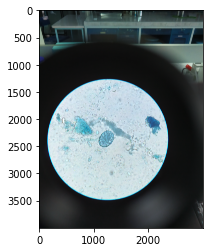

In [4]:
plt.imshow(img)

In [5]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [6]:
l, a, b = cv2.split(img_yuv)

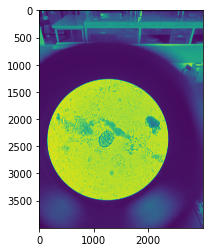

In [7]:
plt.imshow(l)

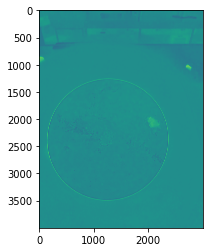

In [8]:
plt.imshow(a)

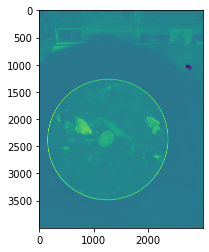

In [9]:
plt.imshow(b)

(array([2.240000e+02, 1.530000e+03, 2.079000e+04, 1.080543e+06,
        1.408701e+06, 7.740130e+05, 5.920020e+05, 3.281730e+05,
        8.775000e+04, 2.273390e+05, 2.426020e+05, 1.017400e+05,
        1.706340e+05, 1.081360e+05, 1.928740e+05, 1.343780e+05,
        1.708910e+05, 8.257000e+04, 1.577810e+05, 8.373800e+04,
        1.708200e+05, 1.538120e+05, 1.081060e+05, 1.474830e+05,
        8.546400e+04, 9.655900e+04, 4.556900e+04, 7.662400e+04,
        4.970300e+04, 6.775300e+04, 7.148300e+04, 5.501400e+04,
        6.724800e+04, 4.083700e+04, 4.433700e+04, 2.413300e+04,
        3.224900e+04, 2.396200e+04, 3.589000e+04, 2.032100e+04,
        2.966700e+04, 2.674000e+04, 1.940000e+04, 2.964100e+04,
        1.807400e+04, 2.433200e+04, 1.422600e+04, 2.026200e+04,
        1.455300e+04, 2.330400e+04, 3.489200e+04, 3.235700e+04,
        6.394800e+04, 4.409500e+04, 7.098100e+04, 4.796300e+04,
        6.681600e+04, 3.810600e+04, 4.692900e+04, 3.363000e+04,
        4.295200e+04, 2.027500e+04, 1.16

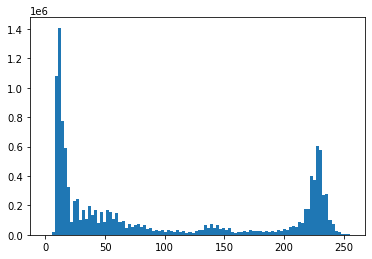

In [10]:
plt.hist(l.flat, bins=100, range=(0,255))

In [11]:
equ = cv2.equalizeHist(l)

In [12]:
equ_b = cv2.equalizeHist(b)

(array([ 61915.,      0.,      0.,      0., 526091.,      0.,      0.,
             0.,      0., 515081.,      0.,      0.,      0., 521141.,
             0.,      0.,      0.,      0.,      0.,      0., 887560.,
             0.,      0.,      0., 402242.,      0.,      0., 371771.,
             0.,      0., 327178.,      0., 264824., 169579., 158594.,
         87750.,  83118., 144221.,  38039., 204563., 101740., 170634.,
        108136., 110266.,  82608., 173846.,  68878., 145115., 100654.,
        140865., 170820.,  67229., 129535., 108538., 141778., 110788.,
        129418.,  98697., 148067.,  90768., 154879., 131938., 103692.,
        138591.,  88120., 143010.,  96570., 139748.,  96372., 137732.,
        144010.,  98238., 140236.,  62334., 129599., 125846.,  77958.,
         94789., 110346., 138482., 153833., 174455.,      0., 197274.,
             0., 199605.,      0., 202616., 199552.,      0., 211577.,
             0., 198815., 163613., 148615., 121568., 114410.,  89969.,
      

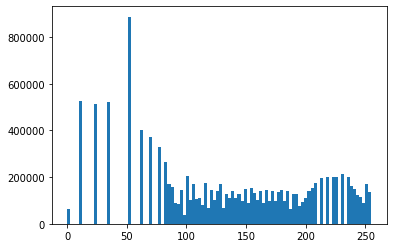

In [13]:
plt.hist(equ.flat, bins=100, range=(0,255))

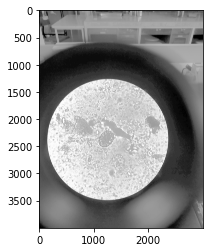

In [14]:
plt.imshow(equ,cmap='gray')

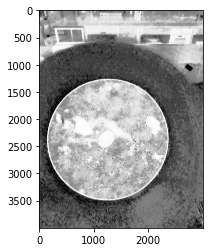

In [15]:
plt.imshow(equ_b,cmap='gray')

In [16]:
merge = cv2.merge((equ, a, b))

In [17]:
img_output = cv2.cvtColor(merge, cv2.COLOR_LAB2BGR)

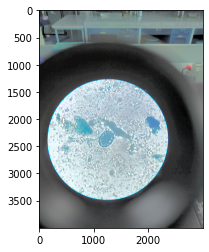

In [18]:
plt.imshow(img_output)

In [19]:
from skimage import io

In [20]:
#Apply CLANE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clane_img = clahe.apply(l)

(array([  4264.,  19249.,  35022., 282811., 262248., 712135., 463373.,
        733047., 459092., 482723., 342262., 152907., 188563., 106865.,
        111453.,  82809., 118606.,  69668., 109615.,  65158., 106850.,
        103787.,  67430.,  91934.,  58149.,  87067.,  46810.,  83284.,
         57972.,  87716.,  89223.,  63828.,  86804.,  56254.,  92720.,
         62658.,  91017.,  63753.,  88713.,  58196.,  88180.,  80544.,
         55200.,  75554.,  50467.,  78770.,  49999.,  75699.,  53736.,
         76651.,  80353.,  53405.,  84165.,  55578.,  82421.,  55515.,
         87731.,  61013.,  92966.,  60883.,  89962.,  88719.,  56826.,
         77364.,  50154.,  71605.,  46757.,  75415.,  52962.,  82326.,
         90847.,  68853., 111844.,  78272., 133510.,  98947., 159438.,
        117367., 188715., 132412., 216782., 226379., 161467., 231574.,
        163220., 239435., 147303., 203458., 129374., 165200., 130026.,
         70159.,  85960.,  44593.,  54749.,  31844.,  36925.,  17778.,
      

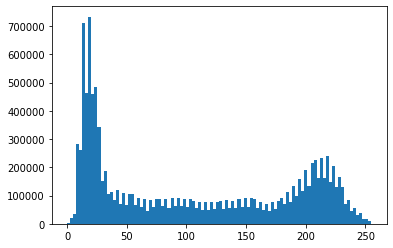

In [21]:
plt.hist(clane_img.flat, bins=100, range=(0,255))

In [22]:
merge_clane = cv2.merge((clane_img, a, b))

In [23]:
img_clane = cv2.cvtColor(merge_clane, cv2.COLOR_LAB2BGR)

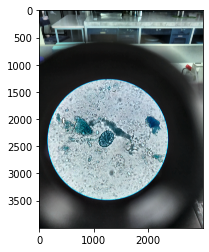

In [24]:
plt.imshow(img_clane,cmap='gray')

In [25]:
clane_gray = cv2.cvtColor(img_clane, cv2.COLOR_BGR2GRAY)

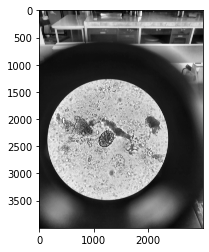

In [26]:
plt.imshow(clane_gray,cmap='gray')

In [27]:
img_gray = cv2.cvtColor(img_output, cv2.COLOR_BGR2GRAY)

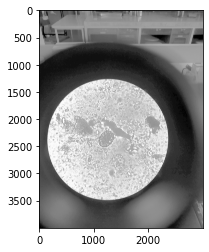

In [28]:
plt.imshow(img_gray,cmap='gray')

In [29]:
imgmedian = cv2.medianBlur(img_gray, 5)

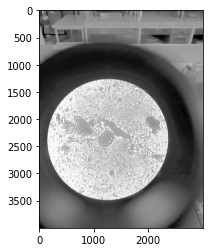

In [30]:
plt.imshow(imgmedian,cmap='gray')

In [31]:
imgmedian = cv2.medianBlur(clane_gray, 5)

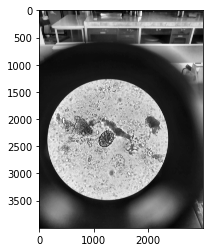

In [32]:
plt.imshow(imgmedian,cmap='gray')

In [33]:
imgblur = cv2.GaussianBlur(imgmedian,(5,5),0)

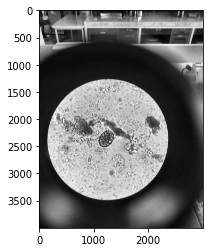

In [34]:
plt.imshow(imgblur,cmap='gray')

In [35]:
from skimage import io, filters, feature
from skimage.filters import roberts, sobel, scharr, prewitt, farid
roberts = roberts(imgblur)
sobel = sobel(imgblur)
scharr = scharr(imgblur)
prewitt = prewitt(imgblur)
farid = farid(imgblur)

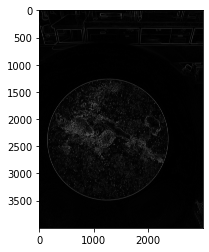

In [36]:
plt.imshow(roberts,cmap='gray')

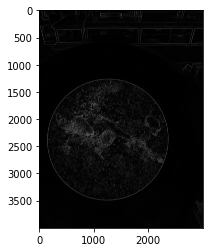

In [37]:
plt.imshow(sobel,cmap='gray')

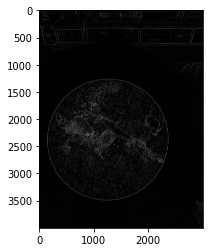

In [38]:
plt.imshow(scharr,cmap='gray')

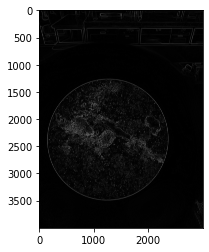

In [39]:
plt.imshow(prewitt,cmap='gray')

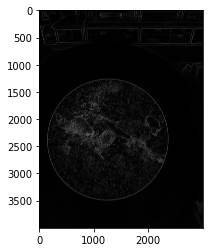

In [40]:
plt.imshow(farid,cmap='gray')

In [41]:
sobel

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00784314, 0.00808452, ..., 0.00620054, 0.00930082,
        0.        ],
       [0.        , 0.00903877, 0.00693242, ..., 0.0083189 , 0.01117819,
        0.        ],
       ...,
       [0.        , 0.00310027, 0.00438445, ..., 0.00294118, 0.00219222,
        0.        ],
       [0.        , 0.00392157, 0.00404226, ..., 0.00277297, 0.00277297,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [43]:
sobel_filters(imgblur)

NameError: ignored

In [ ]:
G, theta = sobel_filters(imgblur)

In [ ]:
G

In [ ]:
plt.imshow(G,cmap='gray')

In [ ]:
import numpy as np

In [ ]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * (180 / 3.14)
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [ ]:
nonimg = non_max_suppression(G, theta)

In [ ]:
plt.imshow(nonimg,cmap='gray')

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
org = combined.copy()
# Draw parameters
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2

# IoU threshold
threshold = 0.4

# Draw bounding boxes and confidence score
for (start_x, start_y, end_x, end_y), confidence in zip(bounding_boxes, confidence_score):
    (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
    cv2.rectangle(org, (start_x, start_y - (2 * baseline + 5)), (start_x + w, start_y), (0, 255, 255), -1)
    cv2.rectangle(org, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
    cv2.putText(org, str(confidence), (start_x, start_y), font, font_scale, (0, 0, 0), thickness)

# Run non-max suppression algorithm
picked_boxes, picked_score = nms(bounding_boxes, confidence_score, threshold)

# Draw bounding boxes and confidence score after non-maximum supression
for (start_x, start_y, end_x, end_y), confidence in zip(picked_boxes, picked_score):
    (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
    cv2.rectangle(combined, (start_x, start_y - (2 * baseline + 5)), (start_x + w, start_y), (0, 255, 255), -1)
    cv2.rectangle(combined, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
    cv2.putText(combined, str(confidence), (start_x, start_y), font, font_scale, (0, 0, 0), thickness)

In [ ]:
plt.imshow(combined,cmap='gray')

In [ ]:
#grayscale to binary(threshold)

In [ ]:
histr3 = cv2.calcHist([combined],[0],None,[256],[0,256])

In [ ]:
histogram, bin_edges = np.histogram(combined, bins=256, range=(0, 1))

In [ ]:
plt.plot(histogram)

In [ ]:
plt.plot(histr3)

In [ ]:
ret1,th1 = cv2.threshold(imgmedian,100,255,cv2.THRESH_BINARY)

In [ ]:
ret1

In [ ]:
plt.imshow(th1,cmap='gray')

In [ ]:
#otsu's threshold

In [ ]:
ret2,th2 = cv2.threshold(combined,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
plt.imshow(th2,cmap='gray')

In [ ]:
ret2

In [ ]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [ ]:
#combined = hysteresis(th2, weak=110, strong=255)

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(combined,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')

In [ ]:
erosion = cv2.erode(dilation,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')

In [ ]:
th, erosion = cv2.threshold(erosion, 220, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = erosion.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = erosion.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = erosion | im_floodfill_inv
 
# Display images.
cv2_imshow(erosion)
cv2_imshow(im_floodfill)
cv2_imshow(im_floodfill_inv)
cv2_imshow(im_out)

In [ ]:
New = hysteresis(im_floodfill_inv, weak=110, strong=255)

In [ ]:
plt.imshow(New,cmap='gray')

In [ ]:
cv2_imshow(New)